Dimensions of the image: 400 x 600
Number of pixels equal to 6 in the grayscale image: 64
Darkest pixel value: 0.0
Row and column of the darkest pixel: (88, 2)


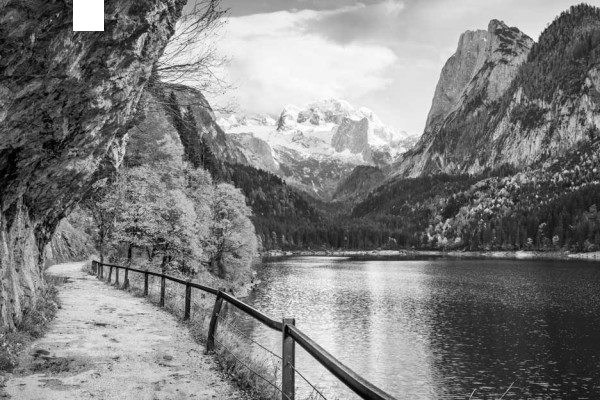

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/nature-image-for-website.jpg')

# Get dimensions of the image
height, width, channels = image.shape
print("Dimensions of the image: {} x {}".format(height, width))

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Count pixels with value 6 in the grayscale image
pixels_equal_to_6 = (gray_image == 6).sum()
print("Number of pixels equal to 6 in the grayscale image:", pixels_equal_to_6)

# Find the darkest pixel in the image
min_value, _, min_loc, _ = cv2.minMaxLoc(gray_image)
print("Darkest pixel value:", min_value)
print("Row and column of the darkest pixel:", min_loc)

# Define the size of the square
square_size = 31

# Calculate the region of interest (ROI) for the square
roi_x = max(0, min_loc[0] - square_size // 2)
roi_y = max(0, min_loc[1] - square_size // 2)
roi_width = min(width, roi_x + square_size) - roi_x
roi_height = min(height, roi_y + square_size) - roi_y

# Replace pixels in the square with white pixels
gray_image[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width] = 255

# Display the modified image
cv2_imshow(gray_image)


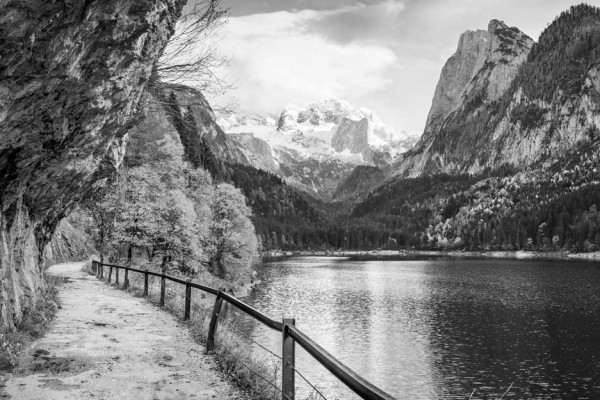

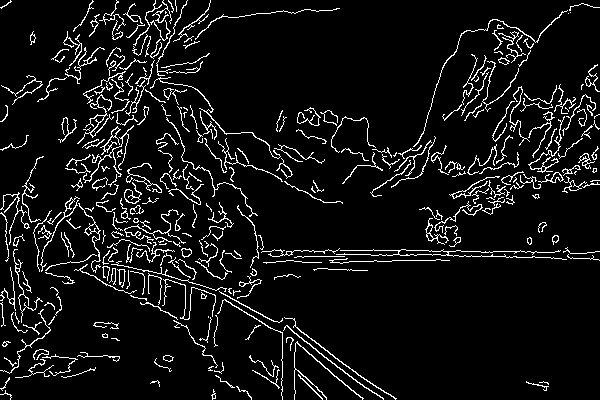

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def canny_edge_detector(image, sigma):
    # Smooth the input image with a Gaussian filter
    smoothed_image = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma, sigmaY=sigma)

    # Apply Canny edge detection
    edges = cv2.Canny(smoothed_image, 50, 150)  # You can adjust the thresholds as needed

    return edges

# Example usage:
# Read an image
image = cv2.imread('/content/nature-image-for-website.jpg', cv2.IMREAD_GRAYSCALE)

# Set the value of sigma
sigma = 1.5

# Apply the Canny edge detector function
edges = canny_edge_detector(image, sigma)

# Display the original image
cv2_imshow(image)
cv2.waitKey(0)

# Display the edges image
cv2_imshow(edges)
cv2.waitKey(0)

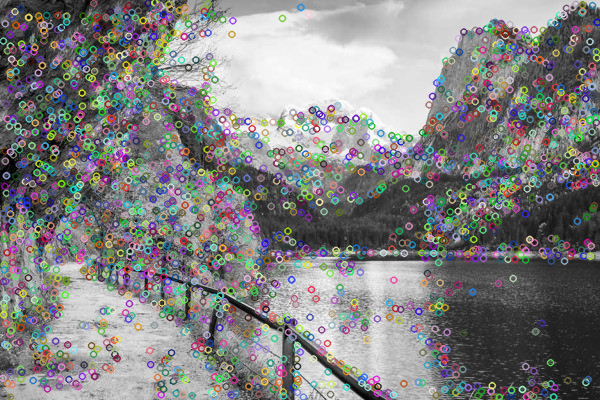

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image
image = cv2.imread('/content/nature-image-for-website.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(gray_image, keypoints, None)

# Display the original image with keypoints
cv2_imshow(image_with_keypoints)


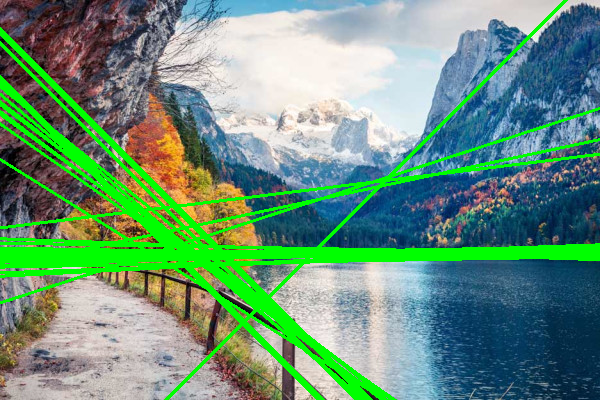

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read an image
image = cv2.imread('/content/nature-image-for-website.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection with lower and upper thresholds
edges = cv2.Canny(blurred_image, 50, 150, apertureSize=3)

# Perform Hough Line Transform with increased threshold
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=160)

# Draw detected lines on the original image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the original image with detected lines
cv2_imshow(image)


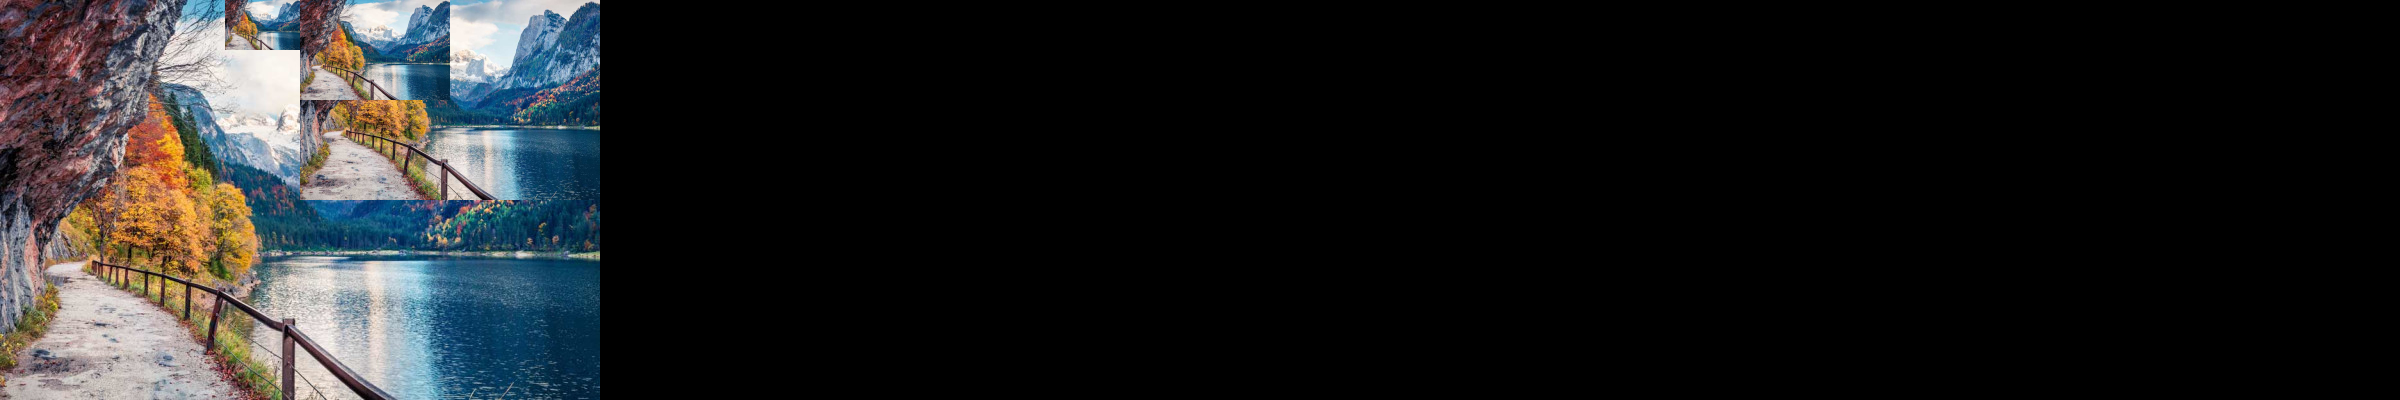

In [ ]:
import cv2


def image_pyramid(image, scale_factor=0.5, min_size=(30, 30)):
    yield image
    while True:
        # Resize the image
        width = int(image.shape[1] * scale_factor)
        height = int(image.shape[0] * scale_factor)
        image = cv2.resize(image, (width, height))

        # Check if the resized image meets the minimum size requirement
        if width < min_size[0] or height < min_size[1]:
            break

        yield image


# Load an example image
image = cv2.imread('/content/nature-image-for-website.jpg')


from google.colab.patches import cv2_imshow
import numpy as np


# Construct the image pyramid
images = []
for i, resized_image in enumerate(image_pyramid(image)):
    images.append(resized_image)


# Determine the size of the grid
num_images = len(images)
num_cols = 4
num_rows = int(np.ceil(num_images / num_cols))


# Create a blank canvas to arrange the images
canvas = np.zeros((num_rows * images[0].shape[0], num_cols * images[0].shape[1], 3), dtype=np.uint8)


# Arrange images in the canvas
for i, img in enumerate(images):
    row = i // num_cols
    col = i % num_cols
    start_row = row * img.shape[0]
    start_col = col * img.shape[1]
    canvas[start_row:start_row+img.shape[0], start_col:start_col+img.shape[1]] = img


# Display the canvas
cv2_imshow(canvas)


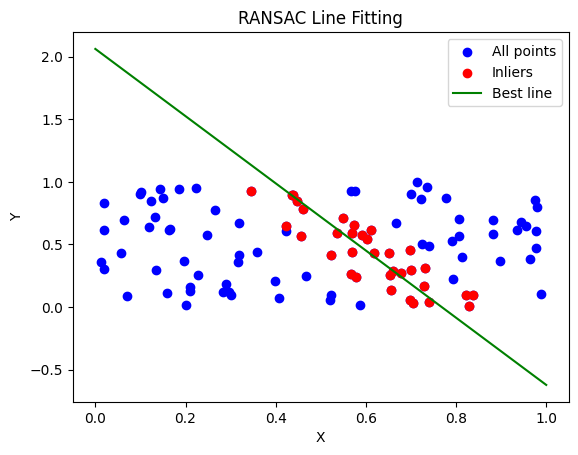

In [ ]:
import numpy as np


def fit_line_ransac(points, num_iterations, threshold):
    best_line = None
    best_inliers = []
    max_inliers = 0

    for _ in range(num_iterations):
        # Randomly select two points
        sample_indices = np.random.choice(len(points), 2, replace=False)
        sample_points = points[sample_indices]

        # Fit a line to the sample points
        line = fit_line(sample_points)

        # Convert line points to NumPy arrays
        line_point1 = np.array(line[0])
        line_point2 = np.array(line[1])

        # Compute distance to the line for all points
        distances = np.abs(np.cross(points - line_point1, line_point2 - line_point1)) / np.linalg.norm(line_point2 - line_point1)

        # Count inliers (points within threshold distance to the line)
        inliers = points[distances < threshold]
        num_inliers = len(inliers)

        # Update best model if this model has more inliers
        if num_inliers > max_inliers:
            max_inliers = num_inliers
            best_line = line
            best_inliers = inliers

    return best_line, best_inliers


def fit_line(points):
    # Fit a line to the given points using linear regression
    x = points[:, 0]
    y = points[:, 1]
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return [(0, c), (1, m + c)]


# Example usage:
# Generate some random 2D points
np.random.seed(0)
points = np.random.rand(100, 2)


# Introduce some outliers
outliers = np.array([[0.1, 0.9], [0.3, 0.1], [0.7, 0.9]])


# Combine inliers and outliers
points = np.vstack([points, outliers])


# Set parameters for RANSAC
num_iterations = 1000
threshold = 0.1


# Fit a line using RANSAC
best_line, best_inliers = fit_line_ransac(points, num_iterations, threshold)


# Plot the points and the best line
import matplotlib.pyplot as plt


plt.scatter(points[:, 0], points[:, 1], color='b', label='All points')
plt.scatter(best_inliers[:, 0], best_inliers[:, 1], color='r', label='Inliers')
plt.plot([best_line[0][0], best_line[1][0]], [best_line[0][1], best_line[1][1]], color='g', label='Best line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('RANSAC Line Fitting')
plt.show()


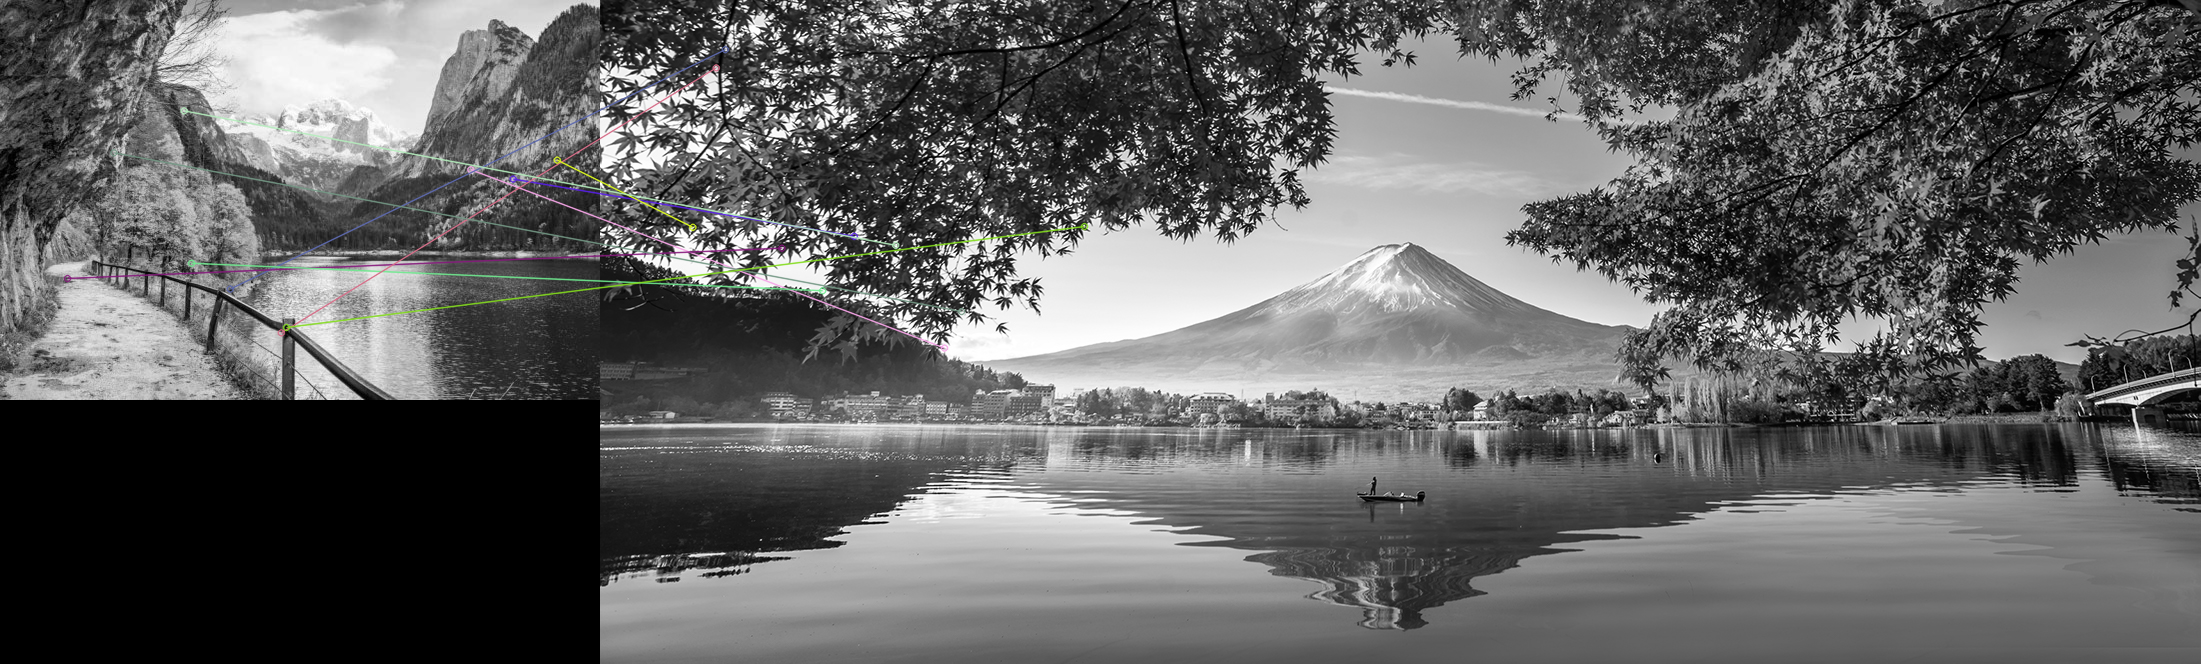

In [ ]:
import cv2
import numpy as np


# Load images
img1 = cv2.imread('/content/nature-image-for-website.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/Landscape-Color.jpg', cv2.IMREAD_GRAYSCALE)


# Initiate ORB detector
orb = cv2.ORB_create()


# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


# Match descriptors
matches = bf.match(des1, des2)


# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)


# Draw first 10 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


# Display the matches
from google.colab.patches import cv2_imshow


# Display the result
cv2_imshow(img_matches)